In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [2]:
file_path = (r"C:\Users\mahas\Downloads\phishing_data.csv.zip")

In [3]:
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
print("Columns:", df.columns)


Dataset Shape: (11481, 89)
Columns: Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious

In [6]:
target_col = "status"

if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' NOT FOUND. Available columns: {df.columns}")

print("\nTarget Value Counts:")
print(df[target_col].value_counts())




Target Value Counts:
status
phishing      5741
legitimate    5740
Name: count, dtype: int64


In [7]:
df.head()


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,zero,3,zero,0,1,0,0,...,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate


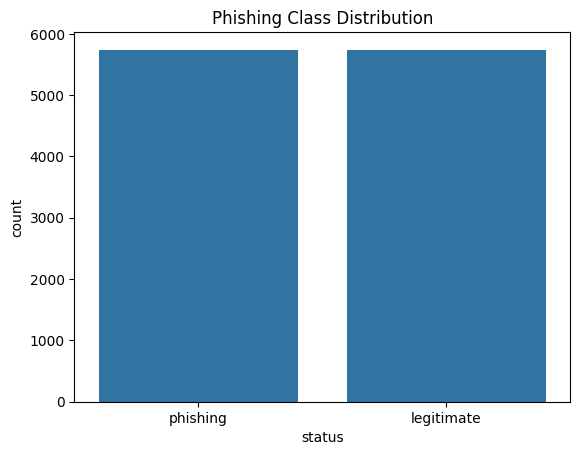

In [8]:
sns.countplot(x=df[target_col])
plt.title("Phishing Class Distribution")
plt.show()

In [9]:
X = df.drop(columns=[target_col])
y = df[target_col]
X = pd.get_dummies(X, drop_first=True)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
y_pred = model.predict(X_test)

In [14]:
print("\nAccuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


Accuracy: 98.39%



Classification Report:
               precision    recall  f1-score   support

  legitimate       0.98      0.99      0.98      1148
    phishing       0.99      0.98      0.98      1149

    accuracy                           0.98      2297
   macro avg       0.98      0.98      0.98      2297
weighted avg       0.98      0.98      0.98      2297



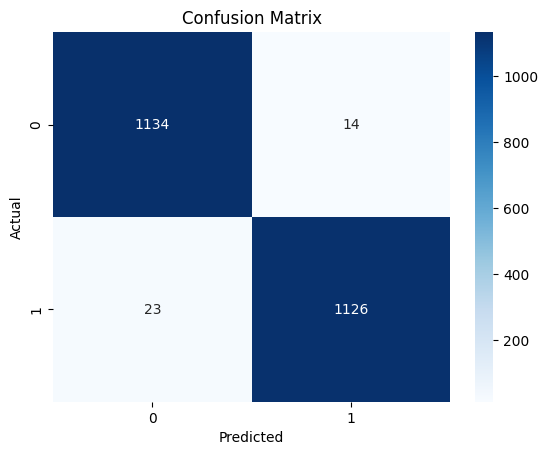

In [15]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


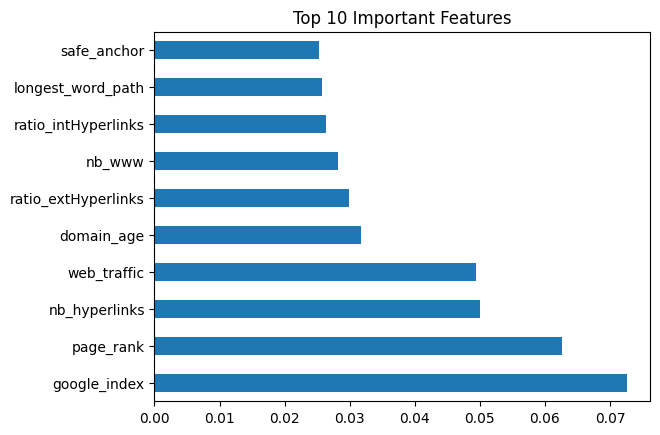

In [16]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


In [17]:
joblib.dump(model, "phishing_model.pkl")
joblib.dump(scaler, "phishing_scaler.pkl")

print("\nModel saved as phishing_model.pkl")
print("Scaler saved as phishing_scaler.pkl")


Model saved as phishing_model.pkl
Scaler saved as phishing_scaler.pkl


In [18]:
print("\nTarget Value Counts:")
print(df[target_col].value_counts())



Target Value Counts:
status
phishing      5741
legitimate    5740
Name: count, dtype: int64


In [19]:
joblib.dump(model, "phishing_model.pkl")
joblib.dump(scaler, "phishing_scaler.pkl")

print("\nModel saved as phishing_model.pkl")
print("Scaler saved as phishing_scaler.pkl")


Model saved as phishing_model.pkl
Scaler saved as phishing_scaler.pkl
